In [1]:
import pandas as pd 

In [2]:
df = pd.read_json(r'C:\Users\luoyu\Desktop\ise540\project\coronavirus_vaccine.json', orient = 'records',lines=True)

In [3]:
df.columns

Index(['og_tweet_txt', 'og_tweet_time', 'og_tweet_id', 'og_tweet_user_id',
       'og_tweet_user_name', 'og_tweet_user_desc', 'og_tweet_user_vrifd',
       'og_tweet_user_loc', 'tweet_txt', 'user_loc', 'tweet_geo',
       'tweet_place', 'tweet_time', 'tweet_id', 'user_id', 'user_name',
       'tweet_likes', 'tweet_source', 'hashtags', 'user_acc_cr_time',
       'user_verified', 'user_total_tweets', 'user_followers', 'filter_word'],
      dtype='object')

In [4]:
df_new = df[['og_tweet_txt','og_tweet_user_desc','og_tweet_user_loc','tweet_txt', 'user_loc', 'tweet_geo','tweet_place','hashtags']]

# NA values

In [6]:
df_new.isnull().sum(axis = 0)

og_tweet_txt             0
og_tweet_user_desc     174
og_tweet_user_loc      719
tweet_txt                0
user_loc              1374
tweet_geo             3448
tweet_place           3432
hashtags                 0
dtype: int64

#### Use user_loc for location, too much NA values in tweet_geo and tweet_place

In [76]:
df_new.loc[:,'hashtags_wordcount'] = [len(x.split()) for x in df_new['hashtags'].tolist()]

In [121]:
with_hashtags = df_new.loc[df_new['hashtags_wordcount'] != 0]

In [122]:
len(with_hashtags)

270

In [125]:
with_hashtags.groupby('og_tweet_txt').sum().head()

,tweet_geo,hashtags_wordcount
og_tweet_txt,,
,0.0,95
"""Oxfam report suggests a few rich countries have already bought over half the future supply of leading #Covid19 vaccine contenders. The problem with this approach is that it simply doesn’t work for the world"" @guardian @peoplesvaccine https://t.co/ApZLUsN0OO",0.0,1
"#AmitShahToNews18 - With major festivals like Navratri and Diwali around the corner, Union Home Minister @AmitShah said that people should certainly celebrate them but they ought to wear masks, maintain distance and sanitize.\n\nhttps://t.co/bYvTXeM52e https://t.co/Wk3gi6ICVc",0.0,1
"#BroncosCountry, make a plan to get your flu shot!\n\n#BroncosROF DB Billy Thompson, members of @BroncosCheer &amp; @5280Miles joined @GovofCO to encourage Coloradans to get their flu shot to minimize non-COVID flu symptoms.\n\n#ItTakesAllOfUs https://t.co/YixyKZfwaL",0.0,2
#COVID19 Vaccine Uses Army Worm Cells and Baculovirus (Insect Virus) Expression Vector Platform\n\nhttps://t.co/Ak26IubxLg\n\n#InformedConsent #LearnTheRisk,0.0,7


#### Out of all 3448 data, only 270 have hashtag, 95 are from not retweet posts

# Hashtag

In [87]:
df_new.hashtags.unique()

array(['', 'Pfizer', 'BREAKING', 'Covid19', 'vaccines', 'Russia',
       'OperationWarpSpeed', 'China', 'coronavirus', 'COVID19',
       'NSTnation', 'COVID', 'Russian', 'presssangharsh', 'tech',
       'vaccine', 'FreedomTrump', 'horseshoecrab', 'ETIndustryNews',
       'COVID19vaccine', 'Gravitas', 'diabetes', 'covid19', 'Obama',
       'BEMxUPCPH', 'Media', 'flushot', 'CovFeFe', 'usariots',
       'ENDBADGOVERNANCE', 'clipo', 'PharmaScrip', 'SayNoToMasks',
       'BillGates', 'CoronavirusPandemic', 'India', 'fakeheadlinebot',
       'virologist', 'news', 'Vaccine', 'HelloDearCHEN', 'flu', 'Chinese',
       'Malliard', 'TheWayISeeIt', 'ICYMI', 'Coronavirus',
       'JohnsonandJohnson', 'Trump2020LandslideVictory', 'Covid19UK',
       'Whistleblower', 'BolsterTheCrew', 'PUPPETREGIME', 'coup', 'MVR',
       'SmartNews', 'covid', 'PRFuture', 'WearADamnMask', 'nitricil',
       'NitricOxide', 'COP26', 'Ukraine', 'GetYourFluShot',
       'CommonsProject', 'QAnons', 'Alert', 'PeersNPubs', 

In [107]:
df_new.loc[df_new['hashtags'] == 'BillGates']['tweet_txt'].tolist()

['BCG: Can a vaccine from 1921 save lives from Covid-19? \n\nREAD MORE: https://t.co/KVjH2kL2oH\n\n#BillGates #cdc… https://t.co/zwMTBGnHOm',
 'RT @free_energy2016: Well, for all crackpots who still believe he is not part of the #BillGates #vaccine cabal... https://t.co/rOlPhS0XlF',
 "RT @DrThomasPaul: THERE IS NO PANDEMIC, THERE IS A GLOBAL CRIME SCENE. Who planned it? #BillGates, THAT'S #WHO. \n\nhttps://t.co/5DBrOWMdM2",
 'Missouri’s COVID-19 vaccination plan \n\nREAD MORE: https://t.co/NDnvglTEwY\n\n#BillGates #cdc #GatesFoundation #GAVI… https://t.co/noGSLALGZV',
 'Missouri COVID-19 vaccination plan submitted to CDC \n\nREAD MORE: https://t.co/Rckk4QXhX2\n\n#BillGates #cdc… https://t.co/2RYTKciYXi']

In [108]:
df_new.loc[df_new['hashtags'] == 'China']['tweet_txt'].tolist()

['RT @AmbLiuXiaoMing: Faced with raging pandemic, #China will continue working hard to accelerate vaccine R&amp;D and make positive contributions…',
 "RT @GreaterKashmir: #China's #COVID19Vaccine  is safe, prompts antibody response: Lancet | Greater Kashmir https://t.co/vvrwpopNHs",
 "RT @GreaterKashmir: #China's #COVID19Vaccine  is safe, prompts antibody response: Lancet | Greater Kashmir https://t.co/vvrwpopNHs"]

#### Hashtags can fall in the following categories: covid, medical companies, country names,  famous people names. tweets with medical company hashtags are neutral news messages. Country names hashtags are mostly neutral messages, even with hashtag 'china'. Famous people name hashtags' sentiment varies by name, 'Obama' 'BillGates' get negative message.

# Wordcloud

(-0.5, 399.5, 199.5, -0.5)

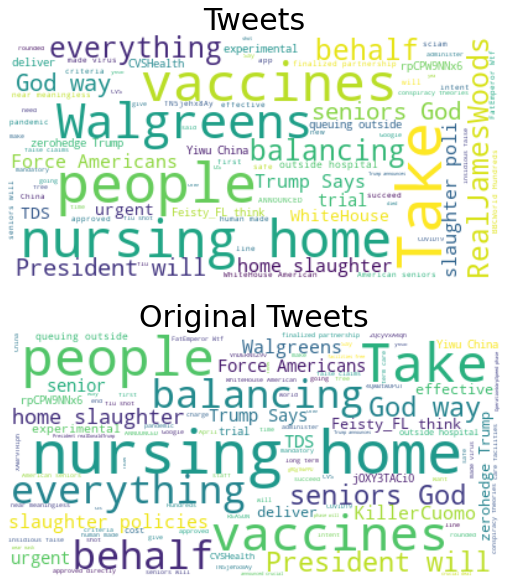

In [115]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt

tweet_txt = " ".join(review for review in df_new.tweet_txt)
tweet_og = " ".join(review for review in df_new.og_tweet_txt)
stop_words = ["https", "co", "RT","vaccine","vaccine", "Vaccine","COVID","Coronavirus"] + list(STOPWORDS)

fig, ax = plt.subplots(2, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_TXT = WordCloud(stopwords = stop_words, max_font_size=50, max_words=100, background_color="white").generate(tweet_txt)
wordcloud_OG = WordCloud(stopwords = stop_words, max_font_size=50, max_words=100, background_color="white").generate(tweet_og)

# Display the generated image:
ax[0].imshow(wordcloud_TXT, interpolation='bilinear')
ax[0].set_title('Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_OG, interpolation='bilinear')
ax[1].set_title('Original Tweets',fontsize=30)
ax[1].axis('off')

# Retweet 

In [116]:
len(df_new.tweet_txt.unique())

1641

In [142]:
df_new['groupcount'] = 1
df_new.groupby('tweet_txt').sum().sort_values(by=['groupcount'],ascending=False).head(10)

<ipython-input-142-9a015f24c678>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['groupcount'] = 1


,tweet_geo,hashtags_wordcount,groupcount
tweet_txt,,,
RT @RealJamesWoods: This President will do everything he can on behalf of seniors. God’s way of balancing the “nursing home slaughter” poli…,0.0,0,184
RT @Feisty_FL: I think a vaccine against TDS is more urgent that a vaccine against Covid.,0.0,0,140
RT @zerohedge: Trump Says He Won't Force Americans To Take COVID-19 Vaccine https://t.co/rpCPW9NNx6,0.0,0,138
"RT @BBCWorld: Hundreds of people have been queuing outside a hospital in Yiwu, China for an experimental coronavirus vaccine\n\nhttps://t.co/…",0.0,0,123
"RT @WhiteHouse: JUST ANNOUNCED: We have finalized a partnership with @CVSHealth and @Walgreens to deliver the Coronavirus vaccine, when app…",0.0,0,113
"RT @FatEmperor: Wtf is the intent for the vaccines - if they can succeed in trials, with criteria that are near-meaningless? 🤔\n\nhttps://t.…",0.0,0,101
RT @WhiteHouse: American seniors will be first in line when a safe and effective Coronavirus vaccine is approved! https://t.co/TN5jehx8Ay,0.0,0,75
"RT @sciam: From a human-made virus to vaccine conspiracy theories, we rounded up the most insidious false claims about the pandemic. https:…",0.0,0,61
RT @BusyDrT: #OperationWarpSpeed phase 2 will involve all #COVID19vaccine recipients being closely tracked &amp; monitored by Google for 2 yea…,0.0,39,39


#### Out of all tweet, around half are duplicates, with some having over 100 duplicate. We need to collect at least 2 times the tweets for the cleaned data to meet our expacted count. 

In [118]:
len(df_new.og_tweet_txt.unique())

675

In [143]:
df_new.groupby('og_tweet_txt').sum().sort_values(by=['groupcount'],ascending=False).head(5)

,tweet_geo,hashtags_wordcount,groupcount
og_tweet_txt,,,
,0.0,95,985
This President will do everything he can on behalf of seniors. God’s way of balancing the “nursing home slaughter” policies of #KillerCuomo.,0.0,0,140
RT @Feisty_FL: I think a vaccine against TDS is more urgent that a vaccine against Covid.,0.0,0,140
RT @zerohedge: Trump Says He Won't Force Americans To Take COVID-19 Vaccine https://t.co/rpCPW9NNx6,0.0,0,138
"Hundreds of people have been queuing outside a hospital in Yiwu, China for an experimental coronavirus vaccine\n\nhttps://t.co/jOXY3TACi0 https://t.co/XABr9THiph",0.0,0,123


In [144]:
df_new.groupby(['og_tweet_txt','tweet_txt']).sum().sort_values(by=['groupcount'],ascending=False).head(5)

,,tweet_geo,hashtags_wordcount,groupcount
og_tweet_txt,tweet_txt,,,
RT @Feisty_FL: I think a vaccine against TDS is more urgent that a vaccine against Covid.,RT @Feisty_FL: I think a vaccine against TDS is more urgent that a vaccine against Covid.,0.0,0,140
This President will do everything he can on behalf of seniors. God’s way of balancing the “nursing home slaughter” policies of #KillerCuomo.,RT @RealJamesWoods: This President will do everything he can on behalf of seniors. God’s way of balancing the “nursing home slaughter” poli…,0.0,0,140
RT @zerohedge: Trump Says He Won't Force Americans To Take COVID-19 Vaccine https://t.co/rpCPW9NNx6,RT @zerohedge: Trump Says He Won't Force Americans To Take COVID-19 Vaccine https://t.co/rpCPW9NNx6,0.0,0,138
"Hundreds of people have been queuing outside a hospital in Yiwu, China for an experimental coronavirus vaccine\n\nhttps://t.co/jOXY3TACi0 https://t.co/XABr9THiph","RT @BBCWorld: Hundreds of people have been queuing outside a hospital in Yiwu, China for an experimental coronavirus vaccine\n\nhttps://t.co/…",0.0,0,123
"JUST ANNOUNCED: We have finalized a partnership with @CVSHealth and @Walgreens to deliver the Coronavirus vaccine, when approved, directly to nursing homes—at no cost to seniors! https://t.co/VnDERNsZ9v","RT @WhiteHouse: JUST ANNOUNCED: We have finalized a partnership with @CVSHealth and @Walgreens to deliver the Coronavirus vaccine, when app…",0.0,0,113


#### Around 1/3 data have no original tweet. Duplicated original tweets are due to duplicated tweets